# Comparing simulations

In this notebook you will compare different simulations, to understand how a manipulation impacts the network activity.

In particular, ...

---

Import some python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# package to work with the circuit
from bluepysnap import Simulation
from bluepysnap.bbp import Cell

In [10]:
root = '/home/data-bbp/20191017/simulations/'

folders = ('minis', 'proj_minis', 'internal_minis', 'no_minis')

target = 'CA1'
sample = 10
t_start, t_end = 200, 1000

In [3]:
def get_spike_frequency(gid, t_start, t_end):
    table = sim.spikes.filter([gid], t_start=t_start, t_stop=t_end).report
    if (t_end-t_start) == 0:
        return 0
    return len(table)*1000.0/(t_end-t_start)

In [4]:
sim = Simulation(root + folders[0] + '/simulation_config.json')
mtypes = sim.circuit.nodes["hippocampus_neurons"].property_values(Cell.MTYPE)
mtypes = sorted(mtypes)

In [14]:
df = pd.DataFrame(index=mtypes,columns=folders)
df

,minis,proj_minis,internal_minis,no_minis
SLM_PPA,NaN,NaN,NaN,NaN
SO_BP,NaN,NaN,NaN,NaN
SO_BS,NaN,NaN,NaN,NaN
SO_OLM,NaN,NaN,NaN,NaN
SO_Tri,NaN,NaN,NaN,NaN
SP_AA,NaN,NaN,NaN,NaN
SP_BS,NaN,NaN,NaN,NaN
SP_CCKBC,NaN,NaN,NaN,NaN
SP_Ivy,NaN,NaN,NaN,NaN
SP_PC,NaN,NaN,NaN,NaN


In [15]:
for folder in folders:
    path = root + folder + '/simulation_config.json'
    sim = Simulation(path)
    for mtype in mtypes:
        print(folder,mtype)
        gids = sim.circuit.nodes["hippocampus_neurons"].ids(group={Cell.MTYPE: mtype, "$node_set": target},limit=sample)
        freqs = np.array([get_spike_frequency(gid, t_start, t_end) for gid in gids])
        df.loc[mtype,folder] = freqs.mean()
df

minis SLM_PPA
minis SO_BP
minis SO_BS
minis SO_OLM
minis SO_Tri
minis SP_AA
minis SP_BS
minis SP_CCKBC
minis SP_Ivy
minis SP_PC
minis SP_PVBC
minis SR_SCA
proj_minis SLM_PPA
proj_minis SO_BP
proj_minis SO_BS
proj_minis SO_OLM
proj_minis SO_Tri
proj_minis SP_AA
proj_minis SP_BS
proj_minis SP_CCKBC
proj_minis SP_Ivy
proj_minis SP_PC
proj_minis SP_PVBC
proj_minis SR_SCA
internal_minis SLM_PPA
internal_minis SO_BP
internal_minis SO_BS
internal_minis SO_OLM
internal_minis SO_Tri
internal_minis SP_AA
internal_minis SP_BS
internal_minis SP_CCKBC
internal_minis SP_Ivy
internal_minis SP_PC
internal_minis SP_PVBC
internal_minis SR_SCA
no_minis SLM_PPA
no_minis SO_BP
no_minis SO_BS
no_minis SO_OLM
no_minis SO_Tri
no_minis SP_AA
no_minis SP_BS
no_minis SP_CCKBC
no_minis SP_Ivy
no_minis SP_PC
no_minis SP_PVBC
no_minis SR_SCA


,minis,proj_minis,internal_minis,no_minis
SLM_PPA,0.833333,0.416667,0,0
SO_BP,11.625,9.875,0,0
SO_BS,0,0,0,0
SO_OLM,0.25,0.25,0,0
SO_Tri,0,0,0,0
SP_AA,42,42.625,0,0
SP_BS,26.5,27.5,0,0
SP_CCKBC,69,69.75,0,0
SP_Ivy,39.125,37.125,0,0
SP_PC,89.25,88.25,0,0


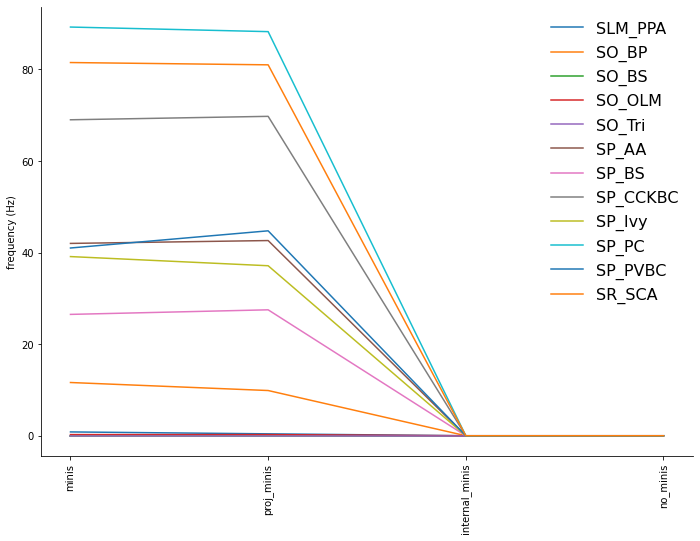

In [16]:
fig, ax = plt.subplots(figsize=(11.69, 8.27))
data = df.values.T
ax.plot(data)
ax.legend(df.index.values, fontsize=16, frameon=False)
# ax.set_xlabel('mtype')
ax.set_ylabel('frequency (Hz)')
# ax.set_title('Frequency')
ax.set_xticks(range(len(folders)))
ax.set_xticklabels(folders, rotation='vertical')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Exercise #1

Description.

In [ ]:
# This is to generate the answers to paste in the submission box below.
# After you defined the variables with your answers, run this cell and the next cell, and copy-paste the output into the box below
print(json.dumps(dict([("ans_1", ans_1)])))

In [ ]:
!pip -q install -i https://bbpteam.epfl.ch/repository/devpi/simple/ single-cell-mooc-client==0.0.5 
import single_cell_mooc_client as sc_mc
s = sc_mc.Submission(hideToken=True)

In [ ]:
s.show_submission(ROLLBACK, TOKEN)